In [ ]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U sentencepiece
!pip install -U urllib3
!pip install -U py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 14.9 MB/s eta 0:00:00

In [ ]:
from datasets import load_dataset


In [ ]:
from transformers import pipeline
from transformers import AutoModelForSeq2SeqLM , AutoTokenizer
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
model = 'facebook/bart-large-cnn'
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSeq2SeqLM.from_pretrained(model)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [ ]:
dataset = load_dataset('Samsung/samsum')

README.md:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

samsum.py:   0%|          | 0.00/3.36k [00:00<?, ?B/s]

The repository for Samsung/samsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/Samsung/samsum.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


corpus.7z:   0%|          | 0.00/2.94M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [ ]:
dataset['train'][0]

{'id': '13818513',
 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}

In [ ]:
dialogue_len = [len(x['dialogue'].split()) for x in dataset['train']]
summary_len = [len(x['summary'].split()) for x in dataset['train']]


array([[<Axes: title={'center': 'dialogue'}>,
        <Axes: title={'center': 'summary'}>]], dtype=object)

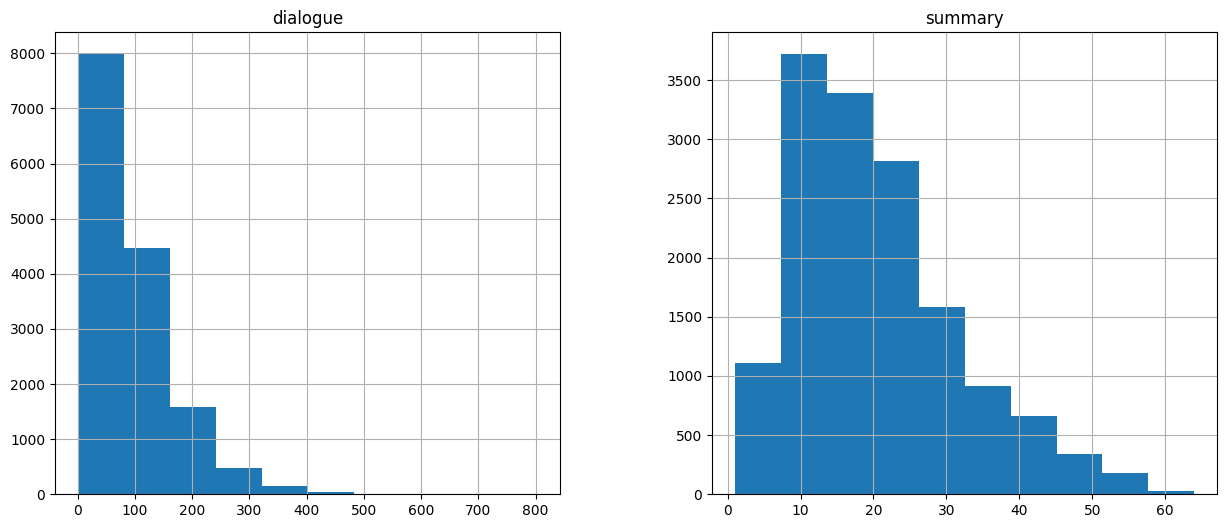

In [ ]:
import pandas as pd

df = pd.DataFrame([dialogue_len,summary_len]).T
df.columns = ['dialogue','summary']
df.hist(figsize=(15,6))

In [ ]:
def get_feature(batch):
  encodings = tokenizer(batch['dialogue'],text_target=batch['summary'], max_length=1024,truncation=True)
  encodings = {'input_ids': encodings['input_ids'], 'attention_mask': encodings['attention_mask'], 'labels': encodings['labels']}
  return encodings

In [ ]:
dataset_pt =dataset.map(get_feature,batched=True)

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [ ]:
dataset_pt

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 818
    })
})

In [ ]:
columns = ['input_ids', 'attention_mask', 'labels']
dataset_pt.set_format(type='torch', columns=columns)

In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

In [ ]:
# from transformers import TrainingArguments , Trainer
# training_args = TrainingArguments(
#     output_dir='bart_samsum',
#     num_train_epochs=1,
#     warmup_steps=500,
#     per_device_train_batch_size=4,
#     per_device_eval_batch_size=4,
#     weight_decay=0.01,
#     logging_steps=10,
#     evaluation_strategy='steps',
#     eval_steps=500,
#     save_steps=1e6,
#     gradient_accumulation_steps=16
# )
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     tokenizer=tokenizer,
#     data_collator=data_collator,
#     train_dataset=dataset_pt['train'],
#     eval_dataset=dataset_pt['validation']
# )
from transformers import TrainingArguments, Trainer, DataCollatorForSeq2Seq

# Define training arguments
training_args = TrainingArguments(
    output_dir='bart_samsum',
    num_train_epochs=1,
    warmup_steps=500,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    logging_steps=10,
    eval_strategy='steps',
    eval_steps=500,
    save_steps=int(1e6),
    gradient_accumulation_steps=16,
    report_to="none"  # Disables W&B and other loggers
)

# Data collator for seq2seq tasks
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

# Initialize the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,  # Use data collator for handling tokenization
    train_dataset=dataset_pt['train'],
    eval_dataset=dataset_pt['validation']
)


In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:2817: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=230, training_loss=23.543549380095108, metrics={'train_runtime': 1884.4974, 'train_samples_per_second': 7.817, 'train_steps_per_second': 0.122, 'total_flos': 8823027777404928.0, 'train_loss': 23.543549380095108, 'epoch': 0.9991854466467553})

In [ ]:
trainer.save_model('bart_samsum_model')

In [ ]:
pipe = pipeline('summarization', model='bart_samsum_model', tokenizer=tokenizer)
#  Pass the tokenizer explicitly to the pipeline function
gen_kwargs = {'length_penalty': 0.8, 'num_beams': 8, 'max_length': 128}

custom_dialogue = """
Uzair: What are you planning to give him?
Musavir: I am hoping to send him on a business trip first.
Uzair: Cool. Is there any suitable work for him?
Musavir: Yes, he did excellent in the previous quater.I am assigning him new project."""
print(pipe(custom_dialogue,**gen_kwargs))

Device set to use cuda:0
Your max_length is set to 128, but your input_length is only 71. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=35)


[{'summary_text': '. Musavir is going to send him on a business trip first. He is assigning him a new project for him, as he did excellent work in the previous quater.    for him new project and he is going on business trip. '}]
